<a href="https://colab.research.google.com/github/mansi-guptaa/Potato-Disease-Classification/blob/main/Potato_deep_learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Potato Disease Classification**



##### **Project Type**    - Deep Learning
##### **Contribution**    - Individual
##### **Team Member 1**   - Mansi Gupta


# **GitHub Link -**

Provide your GitHub Link here.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:
# Load Dataset
data = "/content/drive/MyDrive/dataset/Potato datset/Data"
dataset = tf.keras.preprocessing.image_dataset_from_directory(data, shuffle = True, image_size = (IMAGE_SIZE, IMAGE_SIZE), batch_size = BATCH_SIZE)

Found 2162 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

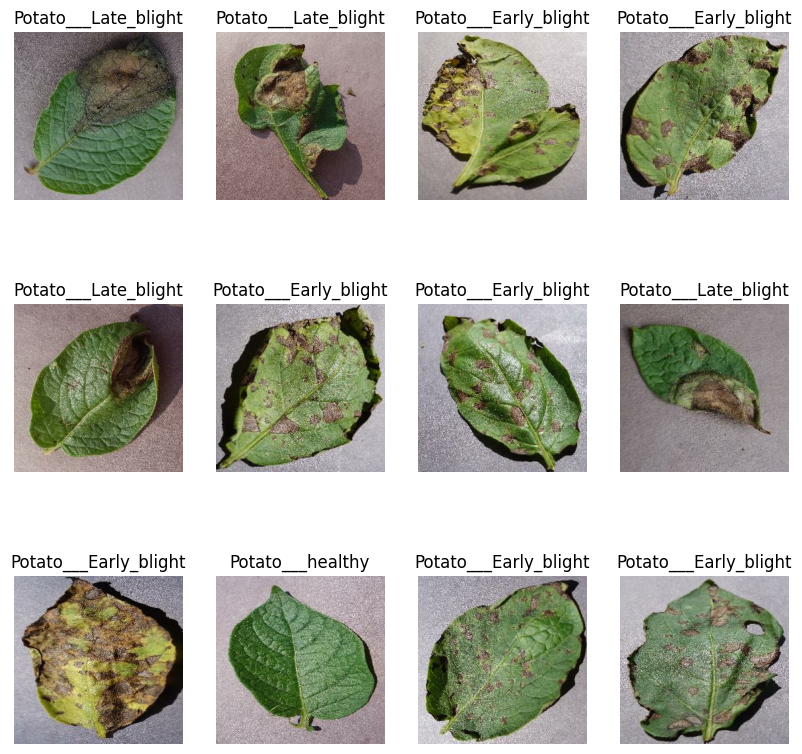

In [ ]:
plt.figure(figsize = (10,10))
for image_batch, labels_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

## Data Splitting

In [ ]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):

  ds_size = len(ds)

  if shuffle:
    ds= ds.shuffle(shuffle_size, seed = 12)

  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds =dataset.take(train_size)

  val_ds = dataset.skip(train_size).take(val_size)
  test_ds = dataset.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
print("Train size: ", len(train_ds))
print("Test size: ", len(test_ds))
print("Validation size: ", len(val_ds))

Train size:  54
Test size:  8
Validation size:  6


##Optimising Datasets

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

## Scaling

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

## Data Augmentation

In [ ]:
data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


## Model Building

In [ ]:
input_size = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n = 3

model = models.Sequential([
    resize_and_rescale,
    data_aug,
    layers.Conv2D(32, kernel_size = (3,3), activation ="relu", input_shape = input_size ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(n, activation = "softmax")


])

model.build(input_shape = input_size)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer= "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
              metrics= ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 636s 2s/step - accuracy: 0.4889 - loss: 0.9593 - val_accuracy: 0.4531 - val_loss: 0.9319
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.6409 - loss: 0.7573 - val_accuracy: 0.6250 - val_loss: 0.8515
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.8022 - loss: 0.4806 - val_accuracy: 0.8958 - val_loss: 0.3489
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.8688 - loss: 0.3346 - val_accuracy: 0.7917 - val_loss: 0.6390
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9077 - loss: 0.2313 - val_accuracy: 0.8854 - val_loss: 0.2696
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9310 - loss: 0.1941 - val_accuracy: 0.9062 - val_loss: 0.2599
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9130 - loss: 0.2132 - val_accuracy: 0.9219 - val_loss: 0.1730
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9664 - loss: 0.1001 - val_accuracy: 0.8594 - v

In [ ]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 72ms/step - accuracy: 0.9874 - loss: 0.0342


In [ ]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Training  V/S  Validation Loss')

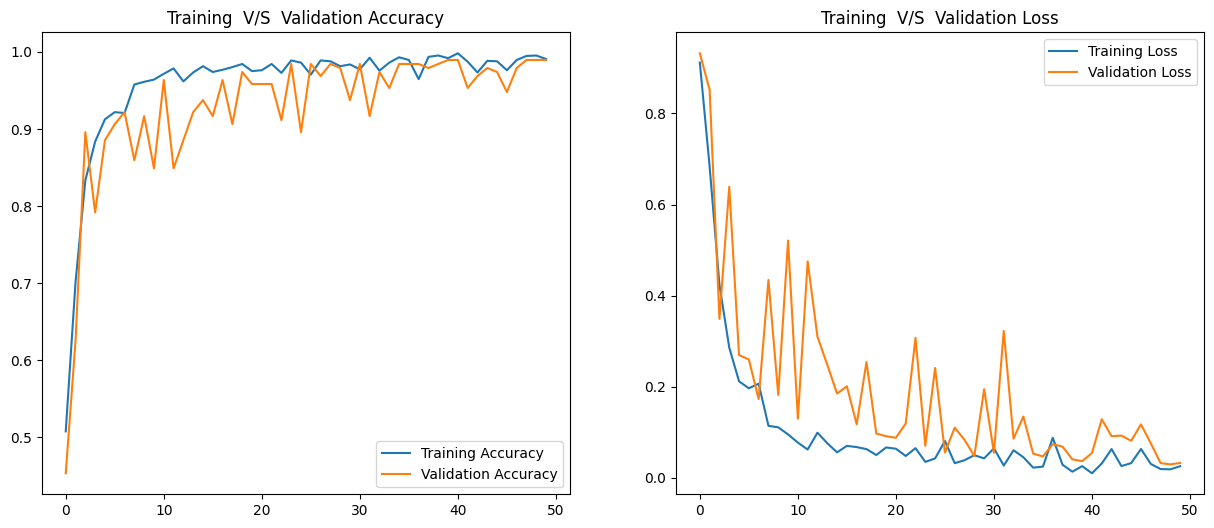

In [ ]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), train_acc, label = "Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training  V/S  Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), train_loss, label = "Training Loss")
plt.plot(range(EPOCHS), val_loss, label = "Validation Loss")
plt.legend(loc = "upper right")
plt.title("Training  V/S  Validation Loss")

## Prediction

Fisrt image to be predicted
Actual_label:  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
predicted_label : Potato___Early_blight


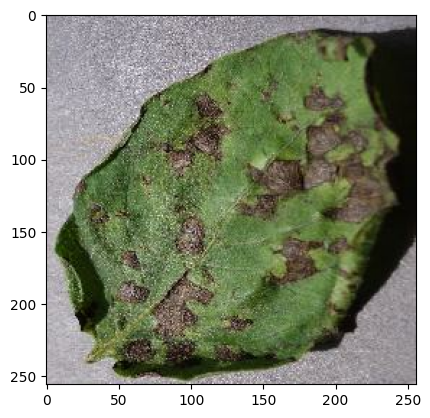

In [ ]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):

  first_img = images_batch[0].numpy().astype("uint8")
  first_img_label = labels_batch[0].numpy()

  print("Fisrt image to be predicted")
  plt.imshow(first_img)
  print("Actual_label: ", class_names[first_img_label])

  Batch_prediction =  model.predict(images_batch)
  print("predicted_label :" ,class_names[np.argmax(Batch_prediction[0])])




In [ ]:
def predict(model, img):
  img_arr = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_arr = tf.expand_dims(img_arr, 0) # creating a batch

  prediction = model.predict(img_arr)

  prediction_class = class_names[np.argmax(prediction[0])]
  confidence = round(100* (np.max(prediction[0])),2)

  return prediction_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


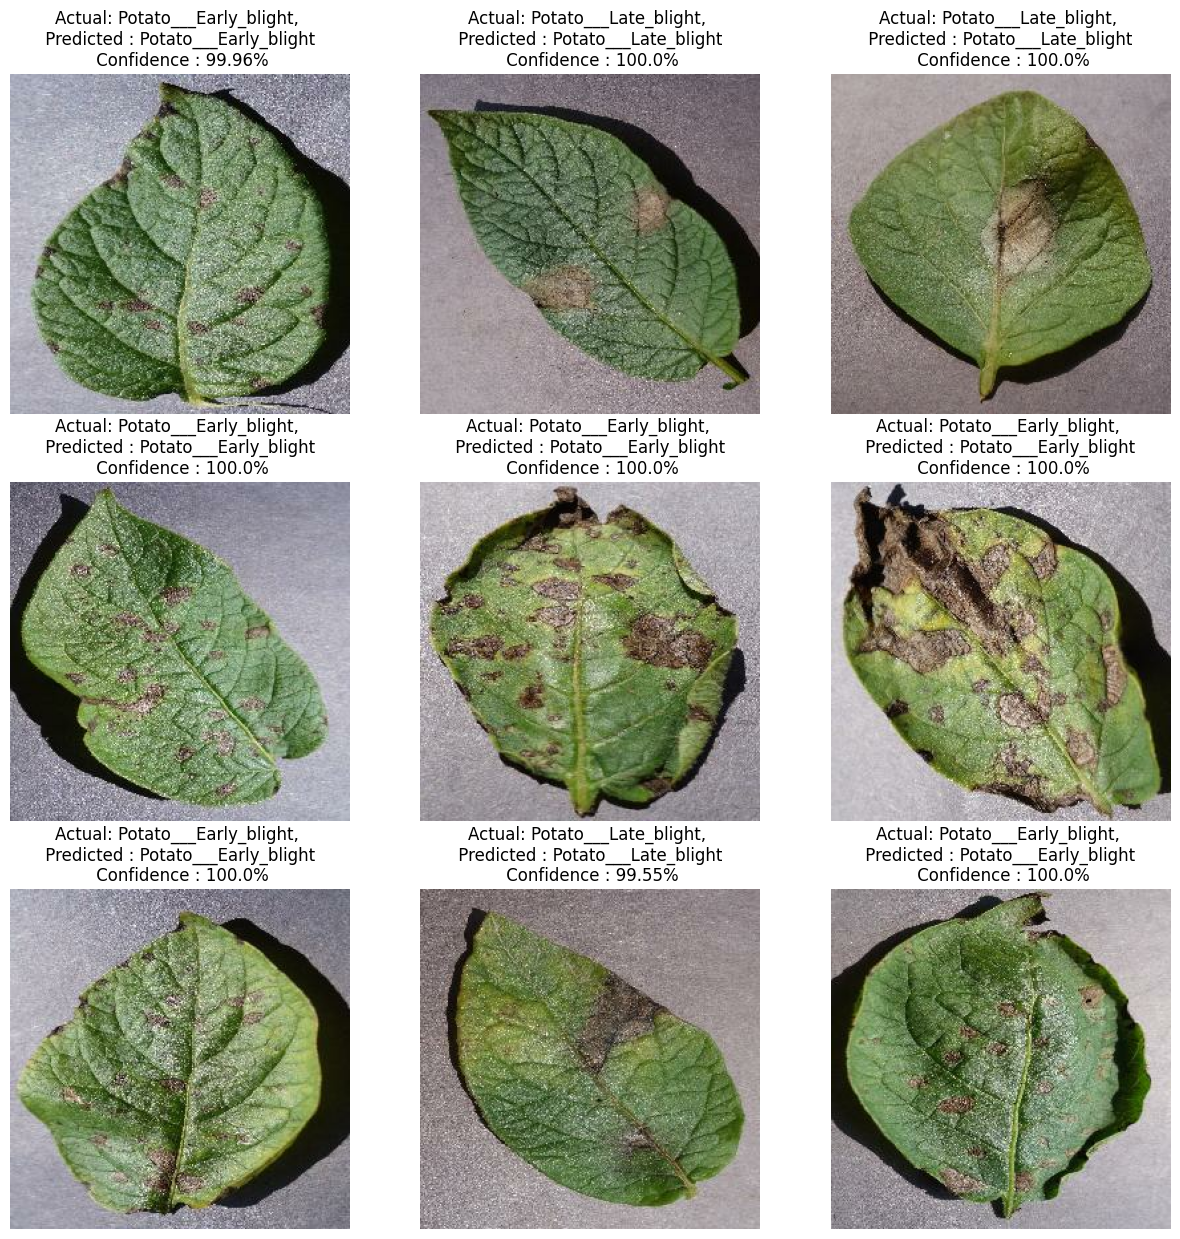

In [ ]:
plt.figure(figsize = (15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    prediction_class, confidence  = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class}, \n Predicted : {prediction_class} \n Confidence : {confidence}%")
    plt.axis("off")